# STEP 1 : DATA LOADING and CLEANING

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')



In [5]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [7]:
# Display basic information about the dataset
print("\nDataset Information:\n")
df.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [9]:
df.isna().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [10]:
# Convert age column from float to integer
df['age'] = df['age'].astype(int)

# Check unique values in gender column
print("\nUnique Values in Gender Column:\n")
print(df['gender'].value_counts())

# Mapping gender based on assumptions
# If you have additional information about whether 0 = Male or Female, update it accordingly
df['gender'] = df['gender'].map({0: 'Male', 1: 'Female'})





Unique Values in Gender Column:

gender
1    253
0    247
Name: count, dtype: int64


In [12]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Male,41,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,Male,40,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,Female,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,Female,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Female,57,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    object 
 4   age                  500 non-null    int64  
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 35.3+ KB


# STEP 2 : DATA PREPROCESSING

## Drop Irrelevant Columns & Encode Categorical Variables

In [14]:


# Drop unnecessary columns
df = df.drop(columns=['customer name', 'customer e-mail'])

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])  # Male = 1, Female = 0
df['country'] = label_encoder.fit_transform(df['country'])  # Convert country names into numbers

# Display dataset after preprocessing
print("\nUpdated Dataset After Encoding:\n")
df.head()



Updated Dataset After Encoding:



,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,1,41,62812.09301,11609.380910,238961.2505,35321.45877
1,17,1,40,66646.89292,9572.957136,530973.9078,45115.52566
2,1,0,43,53798.55112,11160.355060,638467.1773,42925.70921
3,41,0,58,79370.03798,14426.164850,548599.0524,67422.36313
4,26,0,57,59729.15130,5358.712177,560304.0671,55915.46248


In [16]:
df.country.nunique() #211 countries

211

## Outlier Detection & Handling

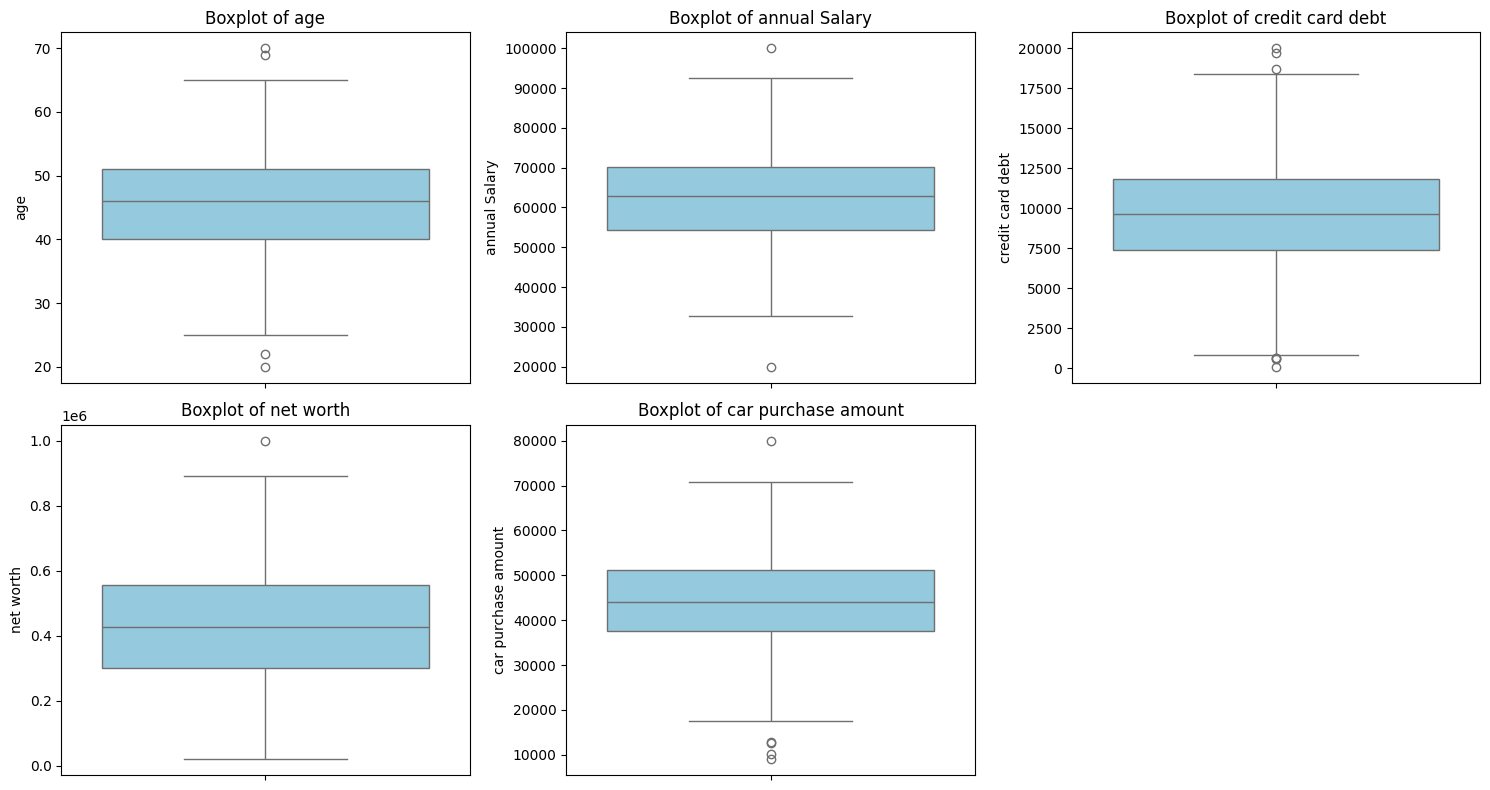

In [19]:


# Identify numerical columns (excluding categorical ones)
numerical_cols = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

# Create boxplots for each numerical feature
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [21]:
df.shape

(500, 7)

In [22]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to numerical columns
for col in numerical_cols:
    df = remove_outliers(df, col)

# Display dataset after outlier handling
print("\nDataset Shape After Removing Outliers:", df.shape)



Dataset Shape After Removing Outliers: (483, 7)


17 outliers are removed .

## Normalization & Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize
numerical_features = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display scaled dataset
print("\nFirst 5 Rows After Normalization:\n")
df.head()



First 5 Rows After Normalization:



,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,1,0.368421,0.503806,0.631882,0.251264,0.307600
1,17,1,0.342105,0.567962,0.512154,0.586356,0.498320
2,1,0,0.421053,0.353011,0.605482,0.709707,0.455678
3,41,0,0.815789,0.780819,0.797489,0.606581,0.932702
4,26,0,0.789474,0.452229,0.264386,0.620013,0.708628


# Building and Training the ANN Model for Sales Prediction

## Split Data into Training & Testing Sets

In [26]:


# Define features (X) and target variable (y)
X = df.drop(columns=['car purchase amount'])  # All columns except target
y = df['car purchase amount']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print("\nTraining Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)



Training Data Shape: (386, 6) (386,)
Testing Data Shape: (97, 6) (97,)


In [27]:
# Step 4: Build and Train an ANN Model

# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer 1
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(1, activation='linear')  # Output layer (predicting car purchase amount)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the ANN model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Save the trained model for future predictions
model.save("car_sales_ann.h5")
print("\nModel saved as 'car_sales_ann.h5' ✅")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 353.6245 - mae: 15.3752 - val_loss: 12.3816 - val_mae: 2.9575
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0620 - mae: 1.5465 - val_loss: 0.1499 - val_mae: 0.3173
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3574 - mae: 0.4646 - val_loss: 0.1948 - val_mae: 0.3784
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1805 - mae: 0.3519 - val_loss: 0.1279 - val_mae: 0.3078
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1080 - mae: 0.2766 - val_loss: 0.0556 - val_mae: 0.2014
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0461 - mae: 0.1741 - val_loss: 0.0251 - val_mae: 0.1313
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0295 - mae: 0.1362 - val_loss: 0.0532 - val_mae: 0.1847
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0480 - mae: 0.1720 - val_loss: 0.0129 - val_mae: 0.0913
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 


Model Evaluation:
Mean Absolute Error (MAE): 0.020697704854307695
Root Mean Squared Error (RMSE): 0.024620498130724054
R² Score: 0.9805327519115085

Model saved as 'car_sales_ann.h5' ✅


#  Making Predictions with New Data

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# ✅ Load the trained ANN model without compiling
model = tf.keras.models.load_model("car_sales_ann.h5", compile=False)

# ✅ Ensure correct feature order using `X_train.columns`
feature_columns = list(X_train.columns)  # Get exact feature names from training

# ✅ Define new customer data (columns must match training data exactly)
new_data = pd.DataFrame({
    'age': [38, 50],
    'gender': ['Male', 'Female'],
    'annual Salary': [80000, 95000],
    'credit card debt': [11000, 7000],
    'net worth': [600000, 720000],
    'country': ['India', 'USA']
})

# ✅ Encode categorical variables (must match training encoding)
label_encoder_gender = LabelEncoder()
label_encoder_country = LabelEncoder()

# Encode gender and country
new_data['gender'] = label_encoder_gender.fit_transform(new_data['gender'])
new_data['country'] = label_encoder_country.fit_transform(new_data['country'])

# ✅ Ensure columns are in the same order as training
new_data = new_data[feature_columns]  # Use feature order from X_train

# ✅ Load the same MinMaxScaler that was trained on `X_train`
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit only on training data

# ✅ Apply the trained MinMaxScaler (DO NOT FIT AGAIN)
new_data_scaled = scaler.transform(new_data)

# Convert to NumPy array
new_data_scaled = np.array(new_data_scaled)

# ✅ Make predictions using the trained ANN
predictions = model.predict(new_data_scaled)

# ✅ Reverse Min-Max Scaling to get actual purchase amounts
y_min = df['car purchase amount'].min()
y_max = df['car purchase amount'].max()

predictions_actual = predictions * (y_max - y_min) + y_min

# ✅ Print final predictions in actual dollar values
print("\nPredicted Car Purchase Amounts:\n")
for i, value in enumerate(predictions_actual):
    print(f"Customer {i+1}: Predicted Purchase Amount = ${value[0]:,.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

Predicted Car Purchase Amounts:

Customer 1: Predicted Purchase Amount = $353,870.69
Customer 2: Predicted Purchase Amount = $423,609.06


# Predict Car Purchase Amounts for 100 Customers

In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# ✅ Load the trained ANN model
model = tf.keras.models.load_model("car_sales_ann.h5", compile=False)

# ✅ Generate 100 random customer data
np.random.seed(42)  # For reproducibility

# Define possible countries
countries = ['USA', 'Canada', 'India', 'Germany', 'France', 'UK', 'Australia', 'Brazil', 'Mexico', 'Japan']
genders = ['Male', 'Female']

# Create random data
num_samples = 100
new_data = pd.DataFrame({
    'age': np.random.randint(25, 65, num_samples),  # Random age between 25-65
    'gender': np.random.choice(genders, num_samples),  # Random gender
    'annual Salary': np.random.randint(30000, 120000, num_samples),  # Salary between 30K-120K
    'credit card debt': np.random.randint(1000, 20000, num_samples),  # Debt between 1K-20K
    'net worth': np.random.randint(50000, 1000000, num_samples),  # Net worth between 50K-1M
    'country': np.random.choice(countries, num_samples)  # Random country
})

# ✅ Encode categorical variables
label_encoder_gender = LabelEncoder()
label_encoder_country = LabelEncoder()

# Apply encoding (same as training)
new_data['gender'] = label_encoder_gender.fit_transform(new_data['gender'])
new_data['country'] = label_encoder_country.fit_transform(new_data['country'])

# ✅ Ensure correct feature order using `X_train.columns`
feature_columns = list(X_train.columns)  # Get exact feature names from training
new_data = new_data[feature_columns]  # Ensure same column order

# ✅ Load the same MinMaxScaler that was fitted on `X_train`
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit only on training data

# ✅ Apply the trained MinMaxScaler
new_data_scaled = scaler.transform(new_data)

# Convert to NumPy array
new_data_scaled = np.array(new_data_scaled)

# ✅ Make predictions using the trained ANN
predictions = model.predict(new_data_scaled)

# ✅ Reverse Min-Max Scaling to get actual purchase amounts
y_min = df['car purchase amount'].min()
y_max = df['car purchase amount'].max()

predictions_actual = predictions * (y_max - y_min) + y_min

# ✅ Add Predictions to DataFrame
new_data['Predicted Car Purchase Amount'] = predictions_actual




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [47]:
new_data

,country,gender,age,annual Salary,credit card debt,net worth,Predicted Car Purchase Amount
0,4,0,63,96199,3200,120313,109913.71875
1,2,1,53,64766,15172,439957,263735.65625
2,4,1,39,103530,3961,234078,175449.96875
3,6,0,32,91087,15207,407429,263168.34375
4,6,0,45,98840,12969,982842,561232.87500
...,...,...,...,...,...,...,...
95,3,0,33,91267,11966,338790,228092.03125
96,0,1,32,78354,1853,940617,527208.75000
97,7,1,36,32557,17958,597337,326550.90625
98,0,1,58,68360,18532,784965,442951.34375
